We have seen that a **random variable** is a variable that has possible values the numerical outcomes of a random phenomenon. 

Examples of random variables: 

1. the outcome of tossing a coin,
2. the outcome of throwing a die, 
3. the birthday of a randomly selected person in a room
4. the height of a person by randomly selecting one person in a room,
5. the weight of a randomly selected person in a room.

In the examples above, the first three are examples of a *discrete* random variable, while the last two (4 and 5) are the *continuous* random variables. The difference is that discrete random variables have a finite number of possible outcomes (if you think at tossing a coin: either *head* or *tail*, for the birthday you have 366 possibilities, but still a finite number) while continuous random variable can potentially have an infinite amount of outcomes: in theory, a person can have whatever weight from 0 to infinity! 

We have also seen that in Math there is this concept of "functions", that express relationship between an input and an output. Let's represent it with the following notation:

$$f: X \longrightarrow Y$$

where X is the set containing all the inputs, Y is the set containing all the outputs.

Do you remember what is a sample space? It is the set of all the possible outcome a random variable can take.

Do you remember what is an event? It is one or more of the possible outcomes a random variable can have. 

Do you remember what is the probability of an event? It is how likely a certain event is, between 0 and 1. 

Well, it would be nice to have a *function* that send an event to its probability, so that goes from the *sample space* to the interval \[0, 1\].

That function is called **Probability distribution**.

$$f:S\longrightarrow [0,1]$$
that given a certain $x$ (value of the sample space) associate the probability of a certain random variable $X$ to be that value:
$$ x \rightarrow P(X=x)$$

Ok, too mathy jargon. Let's do an example with throwing a die. There, the random variable $X$ is "the outcome of throwing a die". Let's pick a possible value $x$ in the sample space of $X$. Which are the suitable ones? Well, 1, 2, 3, 4, 5 and 6. Ok, let's pick 3. This means, we are giving to $x$ the value 3. So the probability distribution will give us $P(X=3)$, that is the probability that $X=3$, where $X$ is "the outcome of throwing a die". Don't make confusion with $X$ and $x$! $X$ is the random variable ("the outcome of throwing a die") while $x$ is one of the potential values a die can take (between 1 and 6).

Then don't get confused by probability and probability distributions: we compute the probability of *an event* (for example $X=3$, or in another words "the outcome of throwing a die is 3") while the probability distribution is the function that assign a probability to a generic, among the possible, events! Not a specific one. This is why we say $P(X=x)$ and not $P(X=2)$ or $P(X=3)$, because we consider a *generic* outcome $x$. 

Now that we have defined a *probability distribution* as a *function*, we can... plot it!

So what do we have on the x-axis? All the possible values from the sample space. 

So what do we have on the y-axis? All the possible probabilities, so the numbers between 0 and 1. So the plot will have as points the couples

(possible_outcome_of_the_random_variable, probability_that_the_random_variable_has_actually_that_possible_outcome_that_I've_drawn_on_the_x-axis)

.

Let's start with the random variable "tossing a coin". We have two possible events, each of them will have $\frac{1}{2}$ probability. So the plot is pretty straightforward and it can be represented by a bar chart:

In [2]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

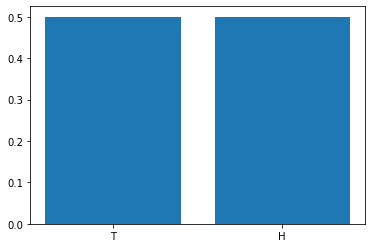

In [3]:
x = ["T", "H"]
y = [1/2, 1/2]

plt.bar(x=x, height=y)

Not so interesting! Same thing for throwing a die:

<BarContainer object of 6 artists>

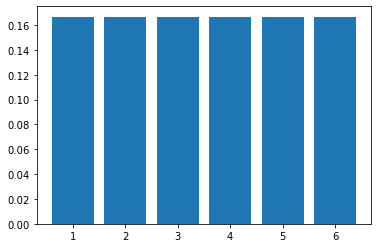

In [4]:
x = range(1,7)
y = [1/6]*6

plt.bar(x=x, height=y)

We can generalize for whatever discrete outcome from a discrete uniform distribution:

<BarContainer object of 364 artists>

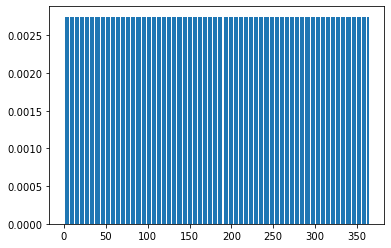

In [5]:
N = 366

x = range(1,365)
y = [1/len(x)]*len(x)

plt.bar(x=x, height=y)

The above chart represent the probability of being born a specific day of the year (counting the year as 366 days equally probable. Not so true, since the 29th of February is less luckily, but forgive my laziness and take it for good.).



What if we want to sample a number between 0 and 1? Just randomly! Let's say that all the points are equally likely. How do you reason? Ok, let's follow the same reasoning of before:

- Each point is equally likely, so each point has probability 1/(amount of possible outcomes)
- How many possible outcomes do we have in the interval \[0,1\]? Well... infinity! 0, 0.1, 0.001, 0.0001, 0.00001... Should I continue?
- What is the result of $\frac{1}{\infty}$? 0!
- So all the points have probability 0. Are they impossible? I'm confused...

Well, don't worry, you're just measuring the wrong way! Instead of *counting* the possible outcomes, let's *measure* them in another way: as the area under the curve given by the function:

$$f(x) = \frac{1}{b-a}$$ if $a\le x\le b$ and $$f(x)=0$$ otherwise.

In fact, this function looks like this:

![image](https://res.cloudinary.com/dyd911kmh/image/upload/c_scale,f_auto,q_auto:best,w_400/v1620756662/visualize-uniform-distribution_kpf2hb.png)

where a and b are the extreme of the interval, that in our example is between 0 and 1, so a=0 and b=1.

That function is called **probability density function (PDF)** and the area under the curve is the **probability distribution function** that a certain random variable gives as output a value between a certain range.

Let's make an example. I'm at the bus stop, and I know that the next bus can arrive anytime from now to 15 minutes from now. How likely is that it arrives in five minutes?

Here the random variable is:

$X$: the arrival time of the bus in minutes from now

The a and b here are 0 and 15 minutes, that is my sample space. I want to know the probability of getting a number between 0 and 5 if I sample a number between 0 and 15.

This will be given by the area under the curve of the function defined above. But if you look at the plot, it's like computing the area of the rectangle under the curve with base \[0, 5\] and height $\frac{1}{15}$. So the formula is $(5-0)\times\frac{1}{15}=\frac{1}{3}$.

It makes sense, isn't it? 5 minutes are just one third of the total 15 minutes of the possible arrival of the bus.

Let's generate some experiments: let's try to randomly sample data points between 0 and 15 and let's count how many of them are actually between 0 a 5:

In [6]:
experiments = np.random.uniform(0,15, size=[1000])

In [7]:
print("Shape:", experiments.shape)
print("Min:", experiments.min())
print("Max:", experiments.max())

Shape: (1000,)
Min: 0.02128550974328347
Max: 14.976656709106223


We have obtained around 1000 points between 0.0163 and 14.99. Let's count how many of them are between 0 and 5:

In [8]:
between_zero_and_five = (experiments<=5).sum()

In [9]:
print(f"There are are {between_zero_and_five} values between zero and five, that is {between_zero_and_five*100/len(experiments)} percent of the total!")

There are are 327 values between zero and five, that is 32.7 percent of the total!


Very close to our predicted 1/3! The more points we take, the closer you would become to the prediction:

In [10]:
experiments = np.random.uniform(0,15, size=[10000])
print("Shape:", experiments.shape)
print("Min:", experiments.min())
print("Max:", experiments.max())
between_zero_and_five = (experiments<=5).sum()
print(f"There are are {between_zero_and_five} values between zero and five, that is {between_zero_and_five*100/len(experiments)} percent of the total!")

Shape: (10000,)
Min: 0.014421341117655806
Max: 14.996147838361003
There are are 3321 values between zero and five, that is 33.21 percent of the total!


We can use `seaborn`'s `distplot` method to plot the histogram of the distribution

In [11]:
import seaborn as sns

/opt/homebrew/anaconda3/envs/condaenv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

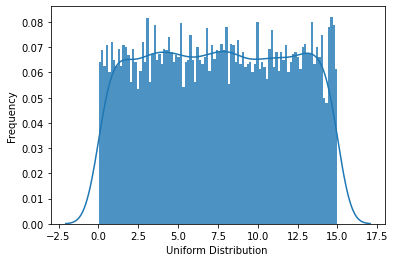

In [12]:
ax = sns.distplot(experiments,
                  bins=100,
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':0.8})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')


Ok, nice, what if we extend it to other kind of probabilities? For example, it's not that all the things in life are equally likely. There are ones that are more likely then others: for example, the height of a person in a country. It's more likely that is a person is above the mean of the heights than being far from it.

Another example comes from the diabetes dataset:

In [13]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


If we visualize the histogram of the BMI column, we notice that the values around the mean are much more frequent then the other, and that we have a kind of symmetrical behaviour:

<AxesSubplot:>

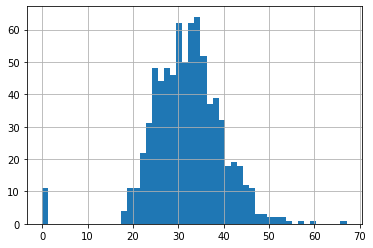

In [15]:
df.BMI.hist(bins=50)

/opt/homebrew/anaconda3/envs/condaenv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

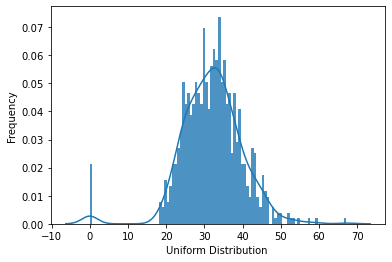

In [16]:
ax = sns.distplot(df.BMI,
                  bins=100,
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':0.8})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')


This is similar to what we define a *Normal Distribution* of the data! For these kind of events, we define the *probability density function* as:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$

What The Fu...nction??

Chill. It's just a bell. Let's give a meaning to all the letters you see in the formula:

- $x$ is a possible outcome of a random variable, like the *height of a person*
- $\mu$ is the mean of the data
- $\sigma$ is the standard deviation of the data
- $e$ is a constant value
- $\pi$ is a constant value
- $2$ is a number, like the constant values before..............
- the dash "-" is a minus sign.............

This was the probability density function of a normal/gaussian distribution. It helps to answer questions like: what is the probability that, if I sample the height of a person of a class, it will be between this and that height? If I know the mean height of a population and the standard deviation of it, I can compute the probability density function as above, and compute the area under the curve of that interval!

Let's see it in practice!


Let's say that I know that the average height is 1.80 and the standard deviation is 10 in my country. I want to know what is the probability that my son is between 1.70 and 1.90.

Well, I can create the curve:

In [17]:
x = np.linspace(120, 250, 1000)
mean = 180
std = 10

def normal(x, mean, std):
    return 1/np.sqrt(2*np.pi*(std**2))*np.exp(-(x-mean)**2/(2*std**2))

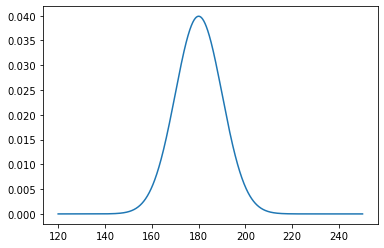

In [18]:
plt.plot(x,normal(x, mean=mean, std=std))

In [19]:
interval = x[np.logical_and(x>=170, x<=190)]

In [20]:
interval.shape

(153,)

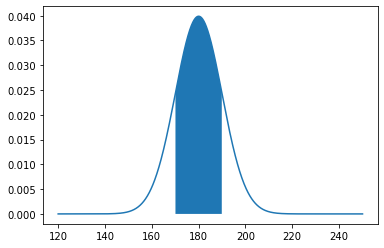

In [21]:
plt.plot(x,normal(x, mean=mean, std=std))
plt.fill_between(interval, normal(interval, mean=mean, std=std))

To compute the area under the curve, we could use the integral for example:

In [22]:
from scipy import integrate
normal_dist = lambda x: normal(x, mean=mean, std=std)
result = integrate.quad(normal_dist, 170, 190)
result[0]

0.6826894921370859

68% of probability of it! 

What if I want to know if he'll be higher than 190?



In [23]:
result = integrate.quad(normal_dist, 190, np.inf)
result[0]

0.15865525393145705

Only 16%. I'm 160, it's ok.

Ok, now what if I have some data like the diabetes one and I want to compute 

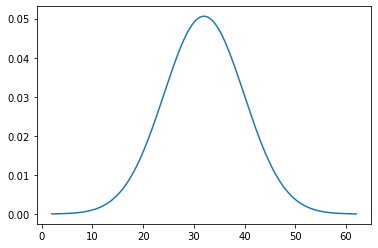

In [24]:
mean = df.BMI.mean()
std = df.BMI.std()
x = np.linspace(mean-30, mean+30, 1000)
plt.plot(x, normal(x, mean=mean, std=std))

What is the probability to have a BMI between 20 and 40? According to our dataset, it's:

In [25]:
between_20_and_40 = df.BMI[np.logical_and(df.BMI<=40, df.BMI>=20)]
probability_between_20_and_40 = len(between_20_and_40)/len(df.BMI)
print(probability_between_20_and_40)

0.84375


<AxesSubplot:>

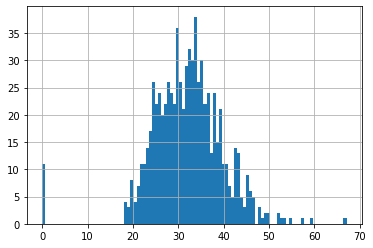

In [26]:
df.BMI.hist(bins=100)

Around 84%! What about the bell curve we just build? Let's compute the area under the curve:

In [27]:
normal_dist = lambda x: normal(x, mean=mean, std=std)
result = integrate.quad(normal_dist, 20, 40)
result[0]

0.780980503122916

78%, close enough!

So far we have seen a general normal/gaussian distribution, that can have any mean and any standard deviation. In case the mean is 0 and the standard deviation is 1, it is called: **standard normal distribution**. We can always standardize the data by subtracting the mean (so that the mean - the mean will be 0) and dividing by the standard deviation (so that the standard deviation divided by the standard deviation gives 1):

$$z = \frac{x-\mu}{\sigma}$$

If we take the example above:

<AxesSubplot:>

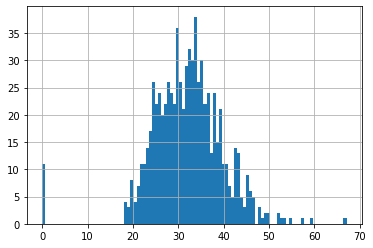

In [34]:
x = df.BMI
mean = df.BMI.mean()
std = df.BMI.std()
x.hist(bins=100)

we can normalize by doing:

<AxesSubplot:>

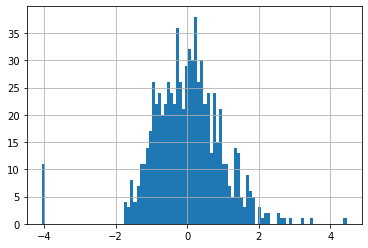

In [35]:
z = (x-mean)/std
z.hist(bins=100)

That you can noticed to be centered in zero this time. If we compute mean and standard deviation from this new distribution we see that:

In [37]:
new_mean = z.mean()
new_std = z.std()
print("Standard mean:", new_mean)
print("Standard std:", new_std)

Standard mean: 2.9660157431961784e-15
Standard std: 1.0000000000000004


The first number is a very small number (so 0) and the second is around 1.

Let's compare normal curve with different means but fixed std:

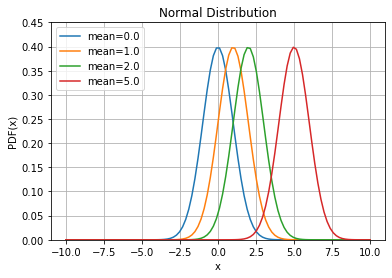

In [41]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
means = [0.0, 1.0, 2.0, 5.0]
for mean in means:
    ax.plot(x, normal(x, mean=mean, std=1), label=f"mean={mean}")
    
ax.set_xlabel('x')
ax.set_ylabel('PDF(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

And now let's compare normal distributions with same mean but different standard deviations:

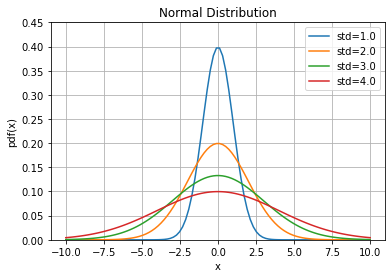

In [43]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
for std in stdvs:
    ax.plot(x, normal(x, mean=0, std=std), label=f"std={std}")
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

The bigger the standard deviation, the highest the spread of the data, the shorter (in terms of height) and the wider the curve.

To describe the density function (the bell curve plotted above) if a guassian distribution we can say that it is symmetrical, centered at the mean (where also the mode and the median are) and its spread is determined by its standard deviation. The standard deviation ($\sigma$ in the formula) is also used to divide the curve into intervals that contains a certain percentage of all the points.

In fact, between the interval $[\mu -\sigma, \mu+\sigma]$ there are around 68.2% of the data points, between $[\mu -2\sigma, \mu+2\sigma]$ around 95.4% of the data points and between $[\mu -3\sigma, \mu+3\sigma]$ there are around 99.6% of the data points! 

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png)

And this is true for whatever mean and standard deviation!

Trying with real data:

In [53]:
mask_sigma = np.logical_and(df.BMI<= (df.BMI.mean() + df.BMI.std()), df.BMI>= (df.BMI.mean() - df.BMI.std()))
len(df.BMI[mask_sigma])/len(df)

0.7513020833333334

A bit more, because the data are not perfectly normally distributed!

In [57]:
mask_2sigma = np.logical_and(df.BMI<= (df.BMI.mean() + 2*df.BMI.std()), df.BMI>= (df.BMI.mean() - 2*df.BMI.std()))
len(df.BMI[mask_2sigma])/len(df)

0.96484375

In [58]:
mask_3sigma = np.logical_and(df.BMI<= (df.BMI.mean() + 3*df.BMI.std()), df.BMI>= (df.BMI.mean() - 3*df.BMI.std()))
len(df.BMI[mask_3sigma])/len(df)

0.9817708333333334

That's it? Do we have this two distributions only? Well, no. There is plenty of them. However, in most data science problems, we assume that certain features of the data are normally distributed.

In fact, there's an important theorem that help us:

### Central Limit Theorem

This theorem says that certain operations (like the mean, or the sum) on random sampled data, tends to have a normal distribution.

What does it mean?

Well, imagine you're waiting at the bus station. Even if the bus can arrive between 0 and 15 minutes with equal probability, the *average waiting time* will be normally distributed!

Isn't it awesome? 

Let's make a simulation.

In [59]:
arrival_times = np.random.uniform(0, 15, 1000)

`arrival_times` contains 1000 points of numbers between 0 and 15, randomly sampled between 0 and 15 with the same probability of each of them. In fact, let's plot the histogram:

(array([ 95.,  87.,  92., 108.,  99., 112.,  85., 114., 107., 101.]),
 array([1.35762553e-02, 1.51136205e+00, 3.00914785e+00, 4.50693365e+00,
        6.00471945e+00, 7.50250525e+00, 9.00029105e+00, 1.04980769e+01,
        1.19958627e+01, 1.34936485e+01, 1.49914343e+01]),
 <BarContainer object of 10 artists>)

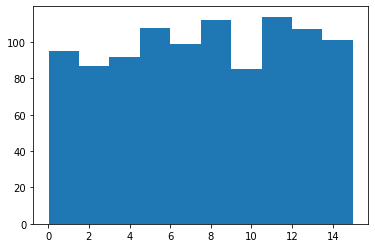

In [60]:
plt.hist(arrival_times)

There's no particular difference between each of the interval.

Ok, now let's say that we generate 1000 points for 300 times, and each time we compute the mean of the points.
    


In [64]:
experiments = 300
means = []
for experiment in range(experiments):
    arrival_times = np.random.uniform(0, 15, 1000)
    mean_arrival_time = np.mean(arrival_times)
    means.append(mean_arrival_time)

The `means` list contains all the calculated means. Remember that the points were uniformly sampled! Let's see the distributions of the mean:

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  1.,  3.,  0.,  0.,  2.,  3.,  0.,  5.,  3.,  0.,  5.,  1.,
         1.,  2.,  3.,  2.,  2.,  4.,  5.,  2.,  9.,  4.,  2.,  6.,  5.,
        12.,  4., 14.,  5.,  9.,  2.,  2.,  9.,  8., 12.,  3.,  8., 11.,
        10.,  9.,  7.,  4.,  3.,  4.,  4.,  5.,  6.,  6.,  3., 15.,  4.,
         6.,  4.,  2.,  6.,  4.,  2.,  2.,  2.,  0.,  1.,  0.,  3.,  2.,
         1.,  2.,  1.,  0.,  2.,  1.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([7.08339055, 7.09208861, 7.10078668, 7.10948475, 7.11818281,
        7.12688088, 7.13557895, 7.14427702, 7.15297508, 7.16167315,
        7.17037122, 7.17906929, 7.18776735, 7.19646542, 7.20516349,
        7.21386155, 7.22255962, 7.23125769, 7.23995576, 7.24865382,
        7.25735189, 7.26604996, 7.27474803, 7.28344609, 7.29214416,
        7.30084223, 7.30954029, 7.31823836, 7.32693643, 7.3356345 ,
        7.34433256, 7.3530

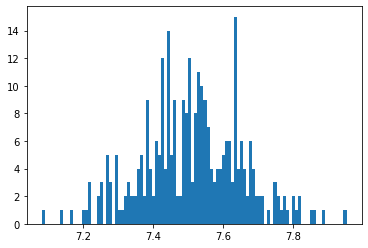

In [67]:
plt.hist(means, bins=100)

Wow, it looks more a normal distribution! Let's do more experiments!

(array([  5.,   0.,   2.,   2.,   1.,   1.,   1.,   8.,   6.,   4.,   6.,
         13.,   9.,  11.,  18.,  27.,  28.,  16.,  35.,  36.,  41.,  55.,
         65.,  63.,  85., 113., 103., 122., 155., 146., 153., 185., 182.,
        209., 227., 208., 229., 273., 258., 285., 286., 298., 350., 330.,
        291., 334., 275., 291., 269., 259., 288., 291., 280., 254., 241.,
        221., 205., 195., 187., 178., 133., 133., 123., 115., 100., 115.,
         82.,  59.,  56.,  56.,  52.,  46.,  46.,  25.,  26.,  18.,  25.,
          9.,  16.,  13.,   4.,  16.,   4.,   2.,   1.,   4.,   3.,   1.,
          2.,   1.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([7.02021159, 7.03081321, 7.04141482, 7.05201644, 7.06261806,
        7.07321967, 7.08382129, 7.09442291, 7.10502452, 7.11562614,
        7.12622776, 7.13682937, 7.14743099, 7.15803261, 7.16863423,
        7.17923584, 7.18983746, 7.20043908, 7.21104069, 7.22164231,
        7.23224393, 7.24284554, 7.25344716, 7.

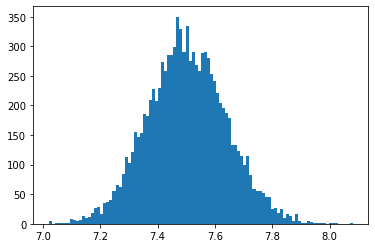

In [68]:
experiments = 10000
means = []
for experiment in range(experiments):
    arrival_times = np.random.uniform(0, 15, 1000)
    mean_arrival_time = np.mean(arrival_times)
    means.append(mean_arrival_time)

plt.hist(means, bins=100)

Self explanatory! What about the sum of all the points? Let's do the same:

In [71]:
experiments = 10000
sums = []
for experiment in range(experiments):
    arrival_times = np.random.uniform(0, 15, 1000)
    sum_arrival_time = np.sum(arrival_times)
    sums.append(sum_arrival_time)

(array([  2.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   1.,   2.,   6.,
          5.,   7.,   7.,   9.,  15.,  11.,  16.,  22.,  21.,  23.,  30.,
         38.,  42.,  45.,  51.,  78.,  62.,  95.,  90., 106., 113., 113.,
        145., 145., 164., 176., 192., 206., 232., 223., 263., 226., 261.,
        286., 264., 270., 283., 292., 283., 294., 278., 287., 295., 303.,
        283., 293., 257., 234., 234., 228., 214., 169., 193., 178., 155.,
        151., 132., 123., 109.,  84.,  78.,  81.,  68.,  54.,  39.,  47.,
         35.,  25.,  23.,  24.,  16.,  15.,  17.,  12.,  12.,   7.,   7.,
          2.,   4.,   3.,   5.,   1.,   2.,   1.,   0.,   0.,   1.,   1.,
          1.]),
 array([6984.26886985, 6994.52834758, 7004.78782531, 7015.04730304,
        7025.30678077, 7035.5662585 , 7045.82573623, 7056.08521396,
        7066.3446917 , 7076.60416943, 7086.86364716, 7097.12312489,
        7107.38260262, 7117.64208035, 7127.90155808, 7138.16103581,
        7148.42051354, 7158.67999127, 7168.939

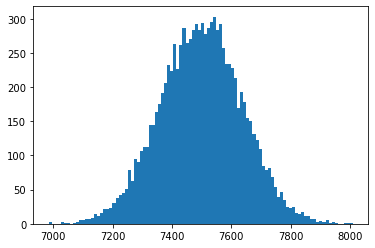

In [72]:
plt.hist(sums, bins=100)

Same story! Pretty cool, isn't it?

What if I randomly created 2D points?

In [89]:
points = np.random.uniform(size=[30,2])

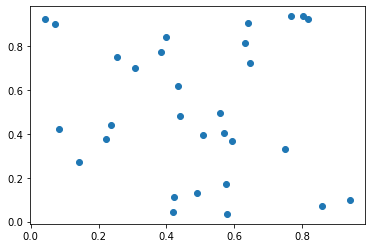

In [90]:
plt.scatter(points[:,0], points[:,1])

The mean of these points is:

In [91]:
mean_point = points.mean(axis=0)

In [92]:
mean_point

array([0.48596309, 0.51354612])

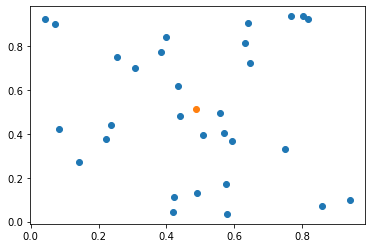

In [93]:
plt.scatter(points[:,0], points[:,1])
plt.scatter(mean_point[0], mean_point[1])

What if I run different experiments and sample the mean all the times?

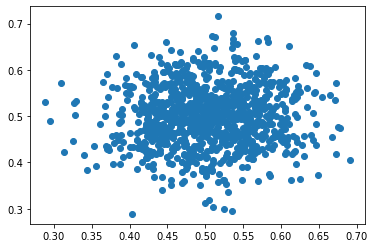

In [94]:
experiments = 1000
X_means = []
Y_means = []
for experiment in range(experiments):
    points = np.random.uniform(size=[20, 2])
    mean_point = points.mean(axis=0)
    X_means.append(mean_point[0])
    Y_means.append(mean_point[1])
    
plt.scatter(X_means, Y_means)

This is how a normal distribution looks like in two variables!



## Goal of this part:

Build a Streamlit app to run sampling experiements and update plots when you update parameters.

I'll give you some ideas, but surprises are always good. 

- Sampling from different shapes: squares, triangles, circles...
- Find some datasets containing normal distributed features (height, weight, IQ...) and show how the distributions vary by changing the amount of individuals in it. 
- Filter the individuals of different groups (still in an interactive way)

Good luck!